In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1.Network parameters
N = 50                 #number of neurons
T = 300                #simulation time(ms)
dt = 1
time = np.arange( 0 , T,dt)

In [4]:
#2.Neuron Parameters
a = np.full(N,0.02)
b = np.full(N,0.2)
c = np.full(N,-65)
d = np.full(N , 8)

In [6]:
# 3. 20% inhibitory neurons
for i in range(int(0.8*N),N):
    a[i] = 0.1
    d[i] = 2

In [8]:
# 4.Initialize variables
v = -65*np.ones((N, len(time)))
u = b*v[:,0]

In [9]:
#5.Random connectivity matrix and spike recording
W = np.random.randn(N,N)
W[:, int(0.8*N):] *= -1    #inhibitory neurons

spikes =[]

In [11]:
# 6.Simulation loop
for t in range(1, len(time)):
    I = np.random.rand(N) * 5   #background input

    for i in range(N):
        v[i,t] = v[i,t-1] + dt*(0.04*v[i,t-1]**2 + 5*v[i,t-1] + 140 - u[i] + I[i])
        u[i] = u[i] + dt*(a[i] * (b[i]*v[i,t-1] - u[i]))

        if v[i,t] >= 30:
            v[i, t-1] = 30
            v[i,t] = c[i]
            u[i] += d[i]
            spikes.append((t,i))

            #synaptic effect on the other neurons
            for j in range(N):
                v[j,t] += W[i,j]

# 7.Raster plot
spike_times = [s[0] for s in spikes]
spike_neurons = [s[1] for s in spikes]

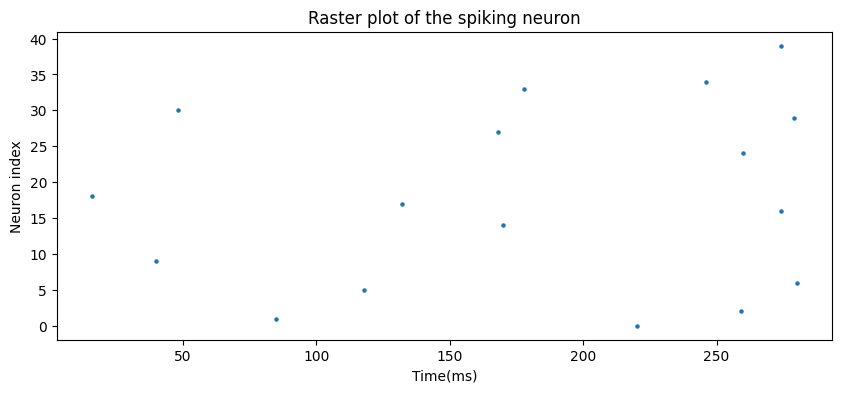

In [12]:
# 8. plot of graph
plt.figure(figsize=(10,4))
plt.scatter(spike_times , spike_neurons , s=5)
plt.xlabel("Time(ms)")
plt.ylabel("Neuron index")
plt.title("Raster plot of the spiking neuron")
plt.show()